In this coding challenge, we will apply all of the skills in Pandas.

## Agricultural project part one 

### Project overview

# Introduction
## project background

Let me walk you through what we're up against and how we'll tackle it.

we're in an ambitious project aimed at automating farming in Maji Ndogo, a place with diverse and challenging agricultural landscapes. Before we dive into the 'how' of farming, we need to figure out the 'where' and 'what'. It's not just about deploying technology; it's about making informed decisions on where to plant specific crops, considering factors like rainfall, soil type, climate, and many others.

Our analysis is the groundwork for this entire automation project. We have an array of variables like soil fertility, climate conditions, and geographical data. By understanding these elements, we can recommend the best locations for different crops. It's a bit like solving a complex puzzle – each piece of data is crucial to seeing the bigger picture.

We'll start by importing our dataset into a DataFrame. It is currently in an SQLite database, and split into tables. Unlike Power BI or SQL, data analysis in Python happens in a single table.

 We'll dive deep into the data, looking for patterns, and correlations. Each clue in the data leads us closer to understanding the best farming practices for Maji Ndogo. Ready to get started? Let's dive into our data and see what stories it has to tell us.



# Data dictionary

**1. Geographic features**

- **Field_ID:** A unique identifier for each field (BigInt).
 
- **Elevation:** The elevation of the field above sea level in metres (Float).

- **Latitude:** Geographical latitude of the field in degrees (Float).

- **Longitude:** Geographical longitude of the field in degrees (Float).

- **Location:** Province the field is in (Text).

- **Slope:** The slope of the land in the field (Float).

**2. Weather features**

- **Field_ID:** Corresponding field identifier (BigInt).

- **Rainfall:** Amount of rainfall in the area in mm (Float).

- **Min_temperature_C:** Average minimum temperature recorded in Celsius (Float).

- **Max_temperature_C:** Average maximum temperature recorded in Celsius (Float).

- **Ave_temps:** Average temperature in Celcius (Float).

**3. Soil and crop features**

- **Field_ID:** Corresponding field identifier (BigInt).

- **Soil_fertility:** A measure of soil fertility where 0 is infertile soil, and 1 is very fertile soil (Float).

- **Soil_type:** Type of soil present in the field (Text).

- **pH:** pH level of the soil, which is a measure of how acidic/basic the soil is (Float).

**4. Farm management features**

- **Field_ID:** Corresponding field identifier (BigInt).

- **Pollution_level:** Level of pollution in the area where 0 is unpolluted and 1 is very polluted (Float).

- **Plot_size:** Size of the plot in the field (Ha) (Float).

- **Chosen_crop:** Type of crop chosen for cultivation (Text).

- **Annual_yield:** Annual yield from the field (Float). This is the total output of the field. The field size and type of crop will affect the Annual Yield

- **Standard_yield:** Standardised yield expected from the field, normalised per crop (Float). This is independent of field size, or crop type. Multiplying this number by the field size, and average crop yield will give the Annual_Yield.

**Average yield (tons/Ha) per crop type:**
- **Coffee:** 1.5 

- **Wheat:** 3

- **Rice:** 4.5

- **Maize:** 5.5

- **Tea:** 1.2

- **Potato:** 20

- **Banana:** 30

- **Cassava:** 13



## DATA


We're dealing with an SQLite database, `Maji_Ndogo_farm_survey.db`, which contains multiple tables. We'll need to join these tables on a common key to create a comprehensive dataset for our analysis. The common key in our case is `Field_ID`.

Here’s how we can do it:

In [1]:
import pandas as pd # importing the Pandas package with an alias, pd
from sqlalchemy import create_engine, text # Importing the SQL interface. If this fails, run !pip install sqlalchemy in another cell.

# Create an engine for the database
engine = create_engine('sqlite:///Maji_Ndogo_farm_survey_small.db') #Make sure to have the .db file in the same directory as this notebook, and the file name matches.

Next up, we test if the connection works by printing out all of the table names in the database.

In [2]:
with engine.connect() as connection:
    result = connection.execute(text("SELECT name FROM sqlite_master WHERE type='table';"))
    for row in result:
        print(row)

('geographic_features',)
('weather_features',)
('soil_and_crop_features',)
('farm_management_features',)


At this point, we use one SQL query and read it into a single DataFrame.

Let's try to use a single SQL query to keep things simple.

In [3]:
#we'll write an SQL query to join our tables. Combine all of the tables into a single query, using `Field_ID`.
sql_query = """

SELECT *
FROM geographic_features AS gf
JOIN weather_features AS wf ON gf.Field_ID = wf.Field_ID
JOIN soil_and_crop_features AS scf ON gf.Field_ID = scf.Field_ID
JOIN farm_management_features AS fmf ON gf.Field_ID = fmf.Field_ID;
"""

With our engine and query ready, we'll use `Pandas` to execute the query. The `pd.read_sql_query` function fetches the data and loads it into a DataFrame – essentially transferring our data from the database into a familiar `Pandas` structure. If you use one query, you will import it all into `MD_agric_df`. 

In [4]:
# Create a connection object
with engine.connect() as connection:
    
    # Use Pandas to execute the query and store the result in a DataFrame
    MD_agric_df = pd.read_sql_query(text(sql_query), connection)

Check the DataFrame to see if it loaded correctly.

In [5]:
MD_agric_df

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Field_ID,Rainfall,Min_temperature_C,Max_temperature_C,...,Field_ID,Soil_fertility,Soil_type,pH,Field_ID,Pollution_level,Plot_size,Crop_type,Annual_yield,Standard_yield
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,40734,1125.2,-3.1,33.1,...,40734,0.62,Sandy,6.169393,40734,8.526684e-02,1.3,0.751354,cassava,0.577964
1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,30629,1450.7,-3.9,30.6,...,30629,0.64,Volcanic,5.676648,30629,3.996838e-01,2.2,1.069865,cassava,0.486302
2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,39924,2208.9,-1.8,28.4,...,39924,0.69,Volcanic,5.331993,39924,3.580286e-01,3.4,2.208801,tea,0.649647
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,5754,328.8,-5.8,32.2,...,5754,0.54,Loamy,5.328150,5754,2.866871e-01,2.4,1.277635,cassava,0.532348
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,14146,785.2,-2.5,31.0,...,14146,0.72,Sandy,5.721234,14146,4.319027e-02,1.5,0.832614,wheat,0.555076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,11472,681.36145,-7.358371,-6.254369,Rural_Akatsi,16.213196,11472,885.7,-4.3,33.4,...,11472,0.61,Sandy,5.741063,11472,3.286828e-01,1.1,0.609930,potato,0.554482
5650,19660,667.02120,-3.154559,-4.475046,Rural_Kilimani,2.397553,19660,501.1,-4.8,32.1,...,19660,0.54,Sandy,5.445833,19660,1.602583e-01,8.7,3.812289,maize,0.438194
5651,41296,670.77900,-14.472861,-6.110221,Rural_Hawassa,7.636470,41296,1586.6,-3.8,33.4,...,41296,0.64,Volcanic,5.385873,41296,8.221326e-09,2.1,1.681629,tea,0.800776
5652,33090,429.48840,-14.653089,-6.984116,Rural_Hawassa,13.944720,33090,1272.2,-6.2,34.6,...,33090,0.63,Silt,5.562508,33090,6.917245e-10,1.3,0.659874,cassava,0.507595


There are a couple of `Field_ID` columns in our DataFrame that we need to remove since we're not interested in particular farms for now.

In [7]:
# Now, drop all columns named 'Field_ID'.
MD_agric_df.drop(columns = 'Field_ID',axis =1)

,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Crop_type,Annual_yield,Standard_yield
0,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.1,33.1,15.00,0.62,Sandy,6.169393,8.526684e-02,1.3,0.751354,cassava,0.577964
1,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,-3.9,30.6,13.35,0.64,Volcanic,5.676648,3.996838e-01,2.2,1.069865,cassava,0.486302
2,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,-1.8,28.4,13.30,0.69,Volcanic,5.331993,3.580286e-01,3.4,2.208801,tea,0.649647
3,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,2.866871e-01,2.4,1.277635,cassava,0.532348
4,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,-2.5,31.0,14.25,0.72,Sandy,5.721234,4.319027e-02,1.5,0.832614,wheat,0.555076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,681.36145,-7.358371,-6.254369,Rural_Akatsi,16.213196,885.7,-4.3,33.4,14.55,0.61,Sandy,5.741063,3.286828e-01,1.1,0.609930,potato,0.554482
5650,667.02120,-3.154559,-4.475046,Rural_Kilimani,2.397553,501.1,-4.8,32.1,13.65,0.54,Sandy,5.445833,1.602583e-01,8.7,3.812289,maize,0.438194
5651,670.77900,-14.472861,-6.110221,Rural_Hawassa,7.636470,1586.6,-3.8,33.4,14.80,0.64,Volcanic,5.385873,8.221326e-09,2.1,1.681629,tea,0.800776
5652,429.48840,-14.653089,-6.984116,Rural_Hawassa,13.944720,1272.2,-6.2,34.6,14.20,0.63,Silt,5.562508,6.917245e-10,1.3,0.659874,cassava,0.507595


# Data cleanup

I noticed some errors in the data. Here's what I picked up:

1. There are some swapped column names. Please ensure to use the correct name. 

2. Some of the crop types contain spelling errors.

3.  The `Elevation` column contains some negative values, which are not plausible, so change these to positive values.

I will use Pandas skills to clean up the data.

In [14]:

#There are some swapped column names. Please ensure to use the correct name.
'''swaps the column'''
MD_agric_df['Crop_type'],MD_agric_df['Annual_yield'] = MD_agric_df['Annual_yield'], MD_agric_df['Crop_type']

#Some of the crop types contain spelling errors.
#the below code is comrised and edited or Casaval,weatt,teaa
replaced_dictionary = {'cassaval ':'cassava','wheatn ': 'wheat','teaa ':'tea'}  
MD_agric_df['Crop_type'] = MD_agric_df['Crop_type'].str.strip().replace(replaced_dictionary)
#The Elevation column contains some negative values, which are not plausible, so change these to positive values.
MD_agric_df['Elevation'] = MD_agric_df['Elevation'].abs()


## Final data checkup

In [9]:
MD_agric_df

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Field_ID,Rainfall,Min_temperature_C,Max_temperature_C,...,Field_ID,Soil_fertility,Soil_type,pH,Field_ID,Pollution_level,Plot_size,Crop_type,Annual_yield,Standard_yield
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,40734,1125.2,-3.1,33.1,...,40734,0.62,Sandy,6.169393,40734,8.526684e-02,1.3,cassava,0.751354,0.577964
1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,30629,1450.7,-3.9,30.6,...,30629,0.64,Volcanic,5.676648,30629,3.996838e-01,2.2,cassava,1.069865,0.486302
2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,39924,2208.9,-1.8,28.4,...,39924,0.69,Volcanic,5.331993,39924,3.580286e-01,3.4,tea,2.208801,0.649647
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,5754,328.8,-5.8,32.2,...,5754,0.54,Loamy,5.328150,5754,2.866871e-01,2.4,cassava,1.277635,0.532348
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,14146,785.2,-2.5,31.0,...,14146,0.72,Sandy,5.721234,14146,4.319027e-02,1.5,wheat,0.832614,0.555076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,11472,681.36145,-7.358371,-6.254369,Rural_Akatsi,16.213196,11472,885.7,-4.3,33.4,...,11472,0.61,Sandy,5.741063,11472,3.286828e-01,1.1,potato,0.609930,0.554482
5650,19660,667.02120,-3.154559,-4.475046,Rural_Kilimani,2.397553,19660,501.1,-4.8,32.1,...,19660,0.54,Sandy,5.445833,19660,1.602583e-01,8.7,maize,3.812289,0.438194
5651,41296,670.77900,-14.472861,-6.110221,Rural_Hawassa,7.636470,41296,1586.6,-3.8,33.4,...,41296,0.64,Volcanic,5.385873,41296,8.221326e-09,2.1,tea,1.681629,0.800776
5652,33090,429.48840,-14.653089,-6.984116,Rural_Hawassa,13.944720,33090,1272.2,-6.2,34.6,...,33090,0.63,Silt,5.562508,33090,6.917245e-10,1.3,cassava,0.659874,0.507595


In [15]:
#chacing unique crop types in our data frame
len(MD_agric_df['Crop_type'].unique())

11

In [19]:
MD_agric_df['Elevation'].min()

35.910797

In [19]:
MD_agric_df['Annual_yield'].dtype

dtype('float64')

# Analysis

## Uncovering crop preferences

Now that we have our data ready, let's delve into understanding where different crops are grown in Maji Ndogo. Our initial step is to focus on tea, a key crop in Maji Ndogo. We need to determine the optimal conditions for its growth. By analyzing data related to elevation, rainfall, and soil type specifically for tea plantations, we'll start to paint a picture of where our farming systems could thrive.

A function that includes only tea fields and returns a tuple with the mean `Rainfall` and the mean `Elevation`. The function should input the full DataFrame, a string value for the crop type to filter by, and output a tuple with rainfall and elevation.


In [31]:

def explore_crop_distribution(df, crop_filter):
    # Filter DataFrame for the specified crop type
    crop_df = df[df['Crop_type'] == crop_filter]
    
    # Calculate the mean rainfall and elevation
    mean_rainfall = crop_df['Rainfall'].mean()
    mean_elevation = crop_df['Elevation'].mean()

    return mean_rainfall, mean_elevation
explore_crop_distribution(MD_agric_df, "tea")
explore_crop_distribution(MD_agric_df, "wheat")


Input: Checking some of the crop types

In [32]:
explore_crop_distribution(MD_agric_df, "tea")

(1537.1194690265486, 774.7544250995577)

In [33]:
explore_crop_distribution(MD_agric_df, "wheat")

(1011.7420972644378, 594.5449350699089)

# Finding fertile grounds


With insights into tea cultivation, let's broaden our horizons. Fertile soil is the bedrock of successful farming. By grouping our data by location and soil type, we'll pinpoint where the most fertile soils in Maji Ndogo are. These fertile zones could be prime candidates for diverse crop cultivation, maximising our yield.

We’ll group our data by soil type to see where the most fertile grounds are. This information will be vital for deciding where to deploy our farming technology.



In [16]:

#Create a function that groups the data by `Soil_type`, and returns the `Soil_fertility`.

def analyse_soil_fertility(df):
    # Group the data by Soil_type and calculate mean Soil_fertility
    soil_fertility_df = df.groupby('Soil_type')['Soil_fertility'].mean()

    return soil_fertility_df
analyse_soil_fertility(MD_agric_df)



Soil_type
Loamy       0.585868
Peaty       0.604882
Rocky       0.582368
Sandy       0.595669
Silt        0.652654
Volcanic    0.648894
Name: Soil_fertility, dtype: float64

Input:

In [17]:
# checking whether the function works
analyse_soil_fertility(MD_agric_df)

Soil_type
Loamy       0.585868
Peaty       0.604882
Rocky       0.582368
Sandy       0.595669
Silt        0.652654
Volcanic    0.648894
Name: Soil_fertility, dtype: float64

## Climate and geography analysis

Now, let's delve into how climate and geography influence farming. By understanding the relationship between factors like elevation, temperature, and rainfall with crop yields, we can identify the most suitable areas for different crops. This analysis is key to ensuring our automated systems are deployed in locations that will maximise their effectiveness.

In [36]:
''a function that takes in a DataFrame and the column name,
and groups the data by that column, and aggregates the data by the 
means of `Elevation`, `Min_temperature_C`, `Max_temperature_C`, and `Rainfall`, and outputs a DataFrame.'''
def climate_geography_influence(df, column):
    # Group by the specified column and calculate the mean for selected columns
    
    grouped_data = df.groupby(column)[['Elevation','Min_temperature_C','Max_temperature_C','Rainfall']].mean()
      
    return grouped_data    
climate_geography_influence(MD_agric_df, 'Crop_type')




,Elevation,Min_temperature_C,Max_temperature_C,Rainfall
Crop_type,,,,
banana,487.973572,-5.354344,31.988152,1659.905687
cassava,682.289063,-3.997273,30.890909,1210.967879
cassava,679.377173,-4.050000,30.783333,1170.583333
cassaval,753.962823,-3.366667,32.283333,1203.766667
coffee,647.047734,-4.028007,30.855189,1527.265074
maize,680.596982,-4.497995,30.576692,681.010276
potato,696.313917,-4.375334,30.300608,660.289064
rice,352.858053,-6.610566,32.727170,1632.382642
tea,774.754425,-2.864159,29.956084,1537.119469


Input:

In [50]:
climate_geography_influence(MD_agric_df, 'Crop_type')

,Elevation,Min_temperature_C,Max_temperature_C,Rainfall
Crop_type,,,,
banana,487.973572,-5.354344,31.988152,1659.905687
cassava,682.903008,-3.992113,30.902381,1210.543006
coffee,647.047734,-4.028007,30.855189,1527.265074
maize,680.596982,-4.497995,30.576692,681.010276
potato,696.313917,-4.375334,30.300608,660.289064
rice,352.858053,-6.610566,32.727170,1632.382642
tea,775.208668,-2.862651,29.950383,1534.507996
wheat,595.838415,-4.968107,30.973845,1010.285991


# Advanced sorting techniques

So the question is, which crop is the top performer in Maji Ndogo, and under what conditions does it perform well? 

To answer this, we need to:
1. Filter all the fields with an above-average `Standard_yield` .
2. Then group by <?> crop type, using `count()`.
3. Sort the values to get the top crop type on top.
4. Retrieve the name of the top index. See the hint below on how to do this. 



In [19]:
grouped_df = MD_agric_df.groupby("Soil_type").mean(numeric_only = True).sort_values(by="Elevation",ascending=False)
print(grouped_df.index[0])
grouped_df

Rocky


,Field_ID,Elevation,Latitude,Longitude,Slope,Field_ID,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Field_ID,Soil_fertility,pH,Field_ID,Pollution_level,Plot_size,Annual_yield,Standard_yield
Soil_type,,,,,,,,,,,,,,,,,,
Rocky,21445.582237,892.665740,-4.115932,-4.774825,8.631688,21445.582237,841.874671,-2.425658,29.131579,13.352961,21445.582237,0.582368,5.239680,21445.582237,0.235317,4.431250,2.197934,0.497657
Volcanic,22534.291949,750.902092,-7.471007,-1.977809,10.883989,22534.291949,1630.504364,-2.993755,30.089992,13.548119,22534.291949,0.648894,4.915182,22534.291949,0.238390,4.228518,2.518344,0.596921
Sandy,23199.894434,743.456509,-4.886504,-4.993451,13.902178,23199.894434,797.665003,-3.821689,30.175496,13.176903,23199.894434,0.595669,5.652828,23199.894434,0.295577,3.527191,1.770793,0.504614
Loamy,22928.133607,552.383554,-4.577196,-3.715553,12.559178,22928.133607,724.785612,-5.620966,31.374717,12.876876,22928.133607,0.585868,5.670844,22928.133607,0.320841,3.567009,2.084702,0.579886
Peaty,24218.576471,467.291922,-10.635362,-5.611269,3.850355,24218.576471,1344.381176,-5.835294,32.032941,13.098824,24218.576471,0.604882,4.945214,24218.576471,0.088177,7.205294,3.265347,0.448361
Silt,21908.957414,424.196238,-11.138730,-6.258565,11.179052,21908.957414,1667.228365,-5.927452,32.306236,13.189392,21908.957414,0.652654,6.375260,21908.957414,0.064196,3.810418,1.865240,0.492600


In [37]:

def find_ideal_fields(df):
    # Filter rows with above average Standard_yield
    above_avg_yield_df = df[df['Standard_yield'] > df['Standard_yield'].mean()]

    # Group by Crop_Type and count occurrences
    crop_counts = above_avg_yield_df.groupby('Crop_type').size()

    # Sort the values in descending order and retrieve the top crop type
    top_crop_type = crop_counts.sort_values(ascending=False).index[0]

    return top_crop_type 
type(find_ideal_fields(MD_agric_df))


str

Input:

In [92]:
type(find_ideal_fields(MD_agric_df))

str

# Advanced filtering techniques

Now we know that <?> is our most successful crop, we can look at what makes it successful.

Create a function that takes a DataFrame as input, and the type of crop, and filters the DataFrame using the following conditions:
1. Filter by crop type.

2. Select only rows that have above average `Standard_yield`.

3. Select only rows that have `Ave_temps` >= 12 but =< 15.

4. Have a `Pollution_level` lower than 0.0001.

In [20]:

def find_good_conditions(df, crop_type):
    # Filter by crop type
    filtered_df = df[df['Crop_type'] == crop_type]

    # Calculate the average Standard_yield for the selected crop
    average_yield = filtered_df['Standard_yield'].mean()

    # Select only rows with above average Standard_yield
    filtered_df = filtered_df[filtered_df['Standard_yield'] > average_yield]

    # Select only rows with Ave_temps between 12 and 15 (inclusive)
    filtered_df = filtered_df[(filtered_df['Ave_temps'] >= 12) & (filtered_df['Ave_temps'] <= 15)]

    # Select only rows with Pollution_level lower than 0.0001
    filtered_df = filtered_df[filtered_df['Pollution_level'] < 0.0001]

    return filtered_df
find_good_conditions(MD_agric_df, "tea").shape



(14, 21)

Input:

In [110]:
find_good_conditions(MD_agric_df, "tea").shape

(14, 21)

# Extra Pandas "nuggets"

We have not even scratched the surface of Pandas or our dataset. If you remember back to your days with Chidi, it took a while before we could unlock the secrets the survey data had. So, scratch around a bit.

On the Pandas front, it's the same. Pandas is a very powerful data analysis tool that takes a while to master. Many of the more advanced methods like window functions, dynamically retrieving or changing data, vectorisation, or processing big data with Pandas are all more advanced topics we encounter in the workplace.



## df.query()

Oh, you're going to love this one... `df.query()` was designed to filter data, but using SQL-like syntax. For example:

In [111]:
MD_agric_df.query('Standard_yield > 0.5 and Soil_type == "Loamy"')

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Field_ID,Rainfall,Min_temperature_C,Max_temperature_C,...,Field_ID,Soil_fertility,Soil_type,pH,Field_ID,Pollution_level,Plot_size,Crop_type,Annual_yield,Standard_yield
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,5754,328.8,-5.8,32.2,...,5754,0.54,Loamy,5.328150,5754,0.286687,2.4,cassava,1.277635,0.532348
19,34153,610.99400,-6.948353,-2.966000,Rural_Hawassa,16.369598,34153,902.8,-4.9,28.4,...,34153,0.61,Loamy,4.698949,34153,0.303487,1.5,wheat,0.791114,0.527409
22,43441,504.42505,-2.379580,-7.601249,Rural_Kilimani,3.906222,43441,335.3,-6.4,32.6,...,43441,0.53,Loamy,5.429212,43441,0.057291,7.1,wheat,4.256354,0.599486
26,1603,525.38104,-2.465188,-5.186775,Rural_Kilimani,6.809244,1603,298.6,-6.3,33.8,...,1603,0.54,Loamy,6.453105,1603,0.192563,4.8,potato,2.603143,0.542321
44,23951,562.14720,-7.953123,-2.222739,Rural_Sokoto,24.619905,23951,1200.3,-5.3,31.8,...,23951,0.66,Loamy,4.649274,23951,0.262477,1.4,tea,0.948407,0.677433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617,3979,636.75790,-7.322326,-5.128215,Rural_Hawassa,17.667543,3979,812.0,-4.8,30.6,...,3979,0.61,Loamy,4.882120,3979,0.193366,0.8,cassava,0.442964,0.553705
5621,18798,509.44156,-6.614932,-1.641644,Rural_Sokoto,19.441830,18798,958.9,-5.8,31.5,...,18798,0.62,Loamy,5.485380,18798,0.800948,1.7,cassava,0.943078,0.554751
5625,17708,614.65955,-6.948353,-3.029065,Rural_Hawassa,2.801264,17708,896.6,-4.9,28.5,...,17708,0.57,Loamy,4.809189,17708,0.288357,5.3,potato,3.053344,0.576103
5632,4969,618.01624,-6.511301,-2.574099,Rural_Hawassa,19.183754,4969,888.0,-4.9,26.9,...,4969,0.62,Loamy,5.231630,4969,0.499646,0.7,wheat,0.350604,0.500862


another way

In [112]:
MD_agric_df[(MD_agric_df['Standard_yield'] > 0.5) & (MD_agric_df['Soil_type'] == 'Loamy')]

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Field_ID,Rainfall,Min_temperature_C,Max_temperature_C,...,Field_ID,Soil_fertility,Soil_type,pH,Field_ID,Pollution_level,Plot_size,Crop_type,Annual_yield,Standard_yield
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,5754,328.8,-5.8,32.2,...,5754,0.54,Loamy,5.328150,5754,0.286687,2.4,cassava,1.277635,0.532348
19,34153,610.99400,-6.948353,-2.966000,Rural_Hawassa,16.369598,34153,902.8,-4.9,28.4,...,34153,0.61,Loamy,4.698949,34153,0.303487,1.5,wheat,0.791114,0.527409
22,43441,504.42505,-2.379580,-7.601249,Rural_Kilimani,3.906222,43441,335.3,-6.4,32.6,...,43441,0.53,Loamy,5.429212,43441,0.057291,7.1,wheat,4.256354,0.599486
26,1603,525.38104,-2.465188,-5.186775,Rural_Kilimani,6.809244,1603,298.6,-6.3,33.8,...,1603,0.54,Loamy,6.453105,1603,0.192563,4.8,potato,2.603143,0.542321
44,23951,562.14720,-7.953123,-2.222739,Rural_Sokoto,24.619905,23951,1200.3,-5.3,31.8,...,23951,0.66,Loamy,4.649274,23951,0.262477,1.4,tea,0.948407,0.677433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617,3979,636.75790,-7.322326,-5.128215,Rural_Hawassa,17.667543,3979,812.0,-4.8,30.6,...,3979,0.61,Loamy,4.882120,3979,0.193366,0.8,cassava,0.442964,0.553705
5621,18798,509.44156,-6.614932,-1.641644,Rural_Sokoto,19.441830,18798,958.9,-5.8,31.5,...,18798,0.62,Loamy,5.485380,18798,0.800948,1.7,cassava,0.943078,0.554751
5625,17708,614.65955,-6.948353,-3.029065,Rural_Hawassa,2.801264,17708,896.6,-4.9,28.5,...,17708,0.57,Loamy,4.809189,17708,0.288357,5.3,potato,3.053344,0.576103
5632,4969,618.01624,-6.511301,-2.574099,Rural_Hawassa,19.183754,4969,888.0,-4.9,26.9,...,4969,0.62,Loamy,5.231630,4969,0.499646,0.7,wheat,0.350604,0.500862


The nice thing is, we can use `in []`, `not in []` to filter with, and also pass in variables using `@variable_name`.

In [113]:
soil_types = ['Loamy', 'Sandy', 'Silt']

MD_agric_df.query('Soil_type in @soil_types')

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Field_ID,Rainfall,Min_temperature_C,Max_temperature_C,...,Field_ID,Soil_fertility,Soil_type,pH,Field_ID,Pollution_level,Plot_size,Crop_type,Annual_yield,Standard_yield
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,40734,1125.2,-3.1,33.1,...,40734,0.62,Sandy,6.169393,40734,8.526684e-02,1.3,cassava,0.751354,0.577964
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,5754,328.8,-5.8,32.2,...,5754,0.54,Loamy,5.328150,5754,2.866871e-01,2.4,cassava,1.277635,0.532348
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,14146,785.2,-2.5,31.0,...,14146,0.72,Sandy,5.721234,14146,4.319027e-02,1.5,wheat,0.832614,0.555076
5,5304,850.56647,-2.050665,-7.132769,Rural_Kilimani,50.451250,5304,649.4,-3.0,29.5,...,5304,0.70,Sandy,5.484350,5304,1.275280e-01,1.7,potato,1.112611,0.654477
6,429,331.35538,-13.409517,-6.722849,Rural_Hawassa,5.907423,429,1586.0,-6.8,31.8,...,429,0.63,Silt,7.061317,429,4.315457e-07,2.9,banana,0.994325,0.342871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5648,26922,748.03925,-2.284961,-3.204745,Rural_Kilimani,3.848560,26922,850.5,-3.7,30.7,...,26922,0.57,Sandy,5.534095,26922,2.333130e-01,10.0,potato,5.938548,0.593855
5649,11472,681.36145,-7.358371,-6.254369,Rural_Akatsi,16.213196,11472,885.7,-4.3,33.4,...,11472,0.61,Sandy,5.741063,11472,3.286828e-01,1.1,potato,0.609930,0.554482
5650,19660,667.02120,-3.154559,-4.475046,Rural_Kilimani,2.397553,19660,501.1,-4.8,32.1,...,19660,0.54,Sandy,5.445833,19660,1.602583e-01,8.7,maize,3.812289,0.438194
5652,33090,429.48840,-14.653089,-6.984116,Rural_Hawassa,13.944720,33090,1272.2,-6.2,34.6,...,33090,0.63,Silt,5.562508,33090,6.917245e-10,1.3,cassava,0.659874,0.507595


# Plotting data with Pandas

To see a basic visualisation of our data. we can use `df.plot(kind='bar')` to make a bar plot, `df.plot(kind='hist', bins = 10)` to see the distribution of a data column, or `df.plot(kind='scatter', x='Column_on_x', y='Column_on_y')` to understand the relationship between variables.

<Axes: xlabel='Crop_type'>

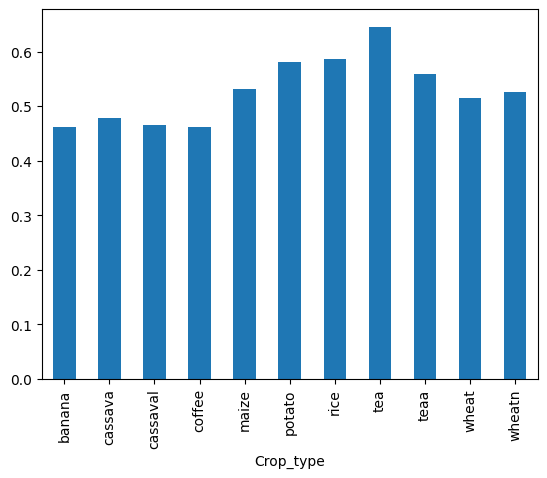

In [21]:
MD_agric_df.groupby('Crop_type')['Standard_yield'].mean().plot(kind='bar')

<Axes: ylabel='Frequency'>

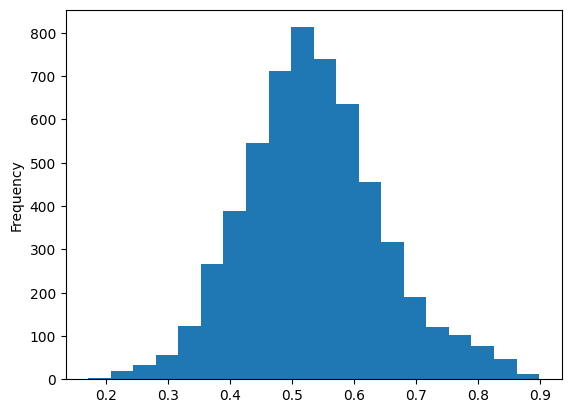

In [22]:
MD_agric_df['Standard_yield'].plot(kind='hist', bins =20)

<Axes: xlabel='Pollution_level', ylabel='Standard_yield'>

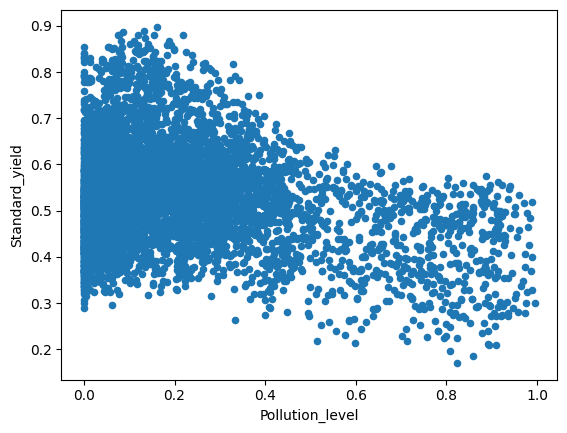

In [116]:
MD_agric_df.plot(kind='scatter', x = "Pollution_level", y = "Standard_yield")